In [13]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [14]:
fastion_minst = tf.keras.datasets.fashion_mnist

In [15]:
(training_images, training_labels), (test_images, test_labels) = fastion_minst.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

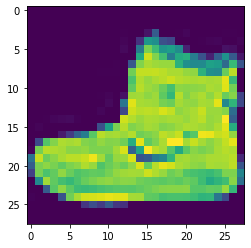

In [16]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_images[0])
print(training_labels[0])

In [97]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98:
            print("\nending traning!!!")
            self.model.stop_training = True

In [98]:
print("training image size {}".format(training_images.shape))
print("test image size {}".format(test_images.shape))

training image size (60000, 28, 28, 1)
test image size (10000, 28, 28, 1)


In [99]:
training_images = training_images.reshape(training_images.shape[0], 28, 28 ,1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [100]:
callbacks = mycallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [101]:
model.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [102]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [103]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 55s 923us/sample - loss: 0.5591 - accuracy: 0.8294
Epoch 2/5
60000/60000 [==============================] - 55s 921us/sample - loss: 0.3301 - accuracy: 0.8783
Epoch 3/5
60000/60000 [==============================] - 55s 921us/sample - loss: 0.2929 - accuracy: 0.8908
Epoch 4/5
60000/60000 [==============================] - 53s 882us/sample - loss: 0.2639 - accuracy: 0.9013
Epoch 5/5
60000/60000 [==============================] - 50s 833us/sample - loss: 0.2483 - accuracy: 0.9073


In [104]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 179us/sample - loss: 0.3230 - accuracy: 0.8873


In [105]:
print(test_loss)

[0.3229788548707962, 0.8873]


# Visualizing the Convolutions and Pooling

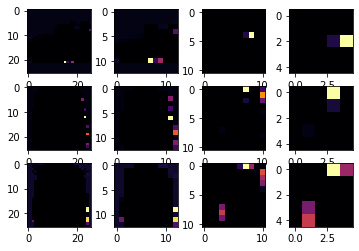

In [106]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)